# Unsupervised Exercise 1

## Implement k-Means clustering

In [1]:
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.metrics import pairwise_distances

import warnings
warnings.simplefilter(action='ignore')

### Preparation: Generate data to use for testing k-means clustering

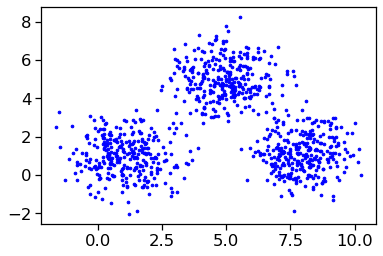

In [2]:
# generate random data 
gt_1 = np.array([1,1])
gt_2 = np.array([5,5])
gt_3 = np.array([8,1])
data_1 = np.random.randn(300,2) + gt_1
data_2 = np.random.randn(300,2) + gt_2
data_3 = np.random.randn(300,2) + gt_3
data = np.concatenate((data_1, data_2, data_3),axis = 0)
plt.scatter(data[:,0], data[:,1], s=7,c='b');

### Question 1: Implement function `k_means`:

### Additional instructions:
When implemeting the function, please make sure to:

**1. Pay attention to your model's run time.**
If your implementation is inefficient, if it will be very slow and will not work on a large number of observations, your model might be useless for real large data in production code.  
Some signs of inefficient code:
1. Usage of loops (especially loops per number of observations, a number that might be extremely big).
2. Usage of a lot of data types and data structures conversions, expecially something that happens inside a loop.
3. Growing data structures - appending 1 by 1 to a growing array

Almost everything you can do with the above, you can do with Numpy arrays operations that work on the whole array at once.

**2. Don't use higher level functions**

Since this is an exercise where we would like to get our hands dirty and to feel what it's like to implement a model from scratch, use mostly built-in Numpy functions, don't use a higher level functions that do most of the work for us, like sklearn distance functions.

**3. Make sure your WCSS calculation is correct**

Consider comparing to `inertia_` parameter of real `sklearn.cluster.KMeans`

**Checking that your model works**:
You can use Question 2a code below to test your code

In [3]:
def k_means(data, k, centroids):

    maxiter = 100
    n = 0
    while n < maxiter:
        # compute distances between each data point and the set of centroids
        # and assign each data point to the closest centroid
        distances_to_centroids = pairwise_distances(data, centroids, metric = 'euclidean')
        cluster_assignment = np.argmin(distances_to_centroids, axis = 1)

        # select all data points that belong to cluster i and compute
        # the mean of these data points (each feature individually)
        # this will be new cluster centroids
        new_centroids = np.array([data[cluster_assignment == i].mean(axis = 0) for i in range(k)])
        
        # if the updated centroid is still the same,
        # then the algorithm converged
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
        #wcss = np.sum(np.sqrt((np.square(data[:,np.newaxis] - centroids).sum(axis=1))))
        wcss = 0
    for i in range(k):
        distances = pairwise_distances(data[cluster_assignment == i], [centroids[i]], metric = 'euclidean')
        wcss += np.sum(distances ** 2)
    return centroids, cluster_assignment, wcss

### Question 2: Test your k-means function with the generated data

In [4]:
def cluster_and_plot(data, k):
    # pick random centers to be initial cluster centers
    initial_centers = data[np.random.randint(data.shape[0],size=k)]

    # cluster with k-means
    centers, assign, wcss = k_means(data, k, initial_centers)

    print('New cluster centers:\n', centers)

    # plot the data-point and the new clusters
    plt.scatter(data[:,0], data[:,1], s=7, c=assign)
    plt.scatter(centers[:,0], centers[:,1], marker='^', c='r', s=80, label='Cluster centers');
    plt.legend()
    plt.title(f'Points clustered with k-means, k: {k}, colored by cluster, WCSS: {round(wcss, 2)}');


#### Questions:
- **2a. Using `cluster_and_plot` function above and your `k-means` function, cluster into 3 clusters and plot the `data` that was generated earlier**


New cluster centers:
 [[4.93011551 5.00117316]
 [7.96345026 1.09057939]
 [1.07174222 0.98259628]]


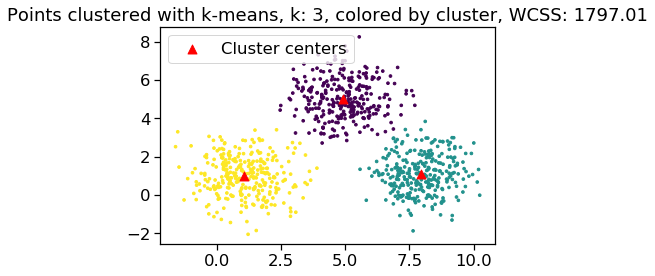

In [5]:
cluster_and_plot(data,3)

- **2b. Would you say that clustering is good?**


Yes,  clustering is good

- **2c. Now cluster into 4 clusters**


New cluster centers:
 [[7.82949158 2.04192988]
 [4.8902025  5.02643303]
 [8.03735683 0.3861805 ]
 [1.07174222 0.98259628]]


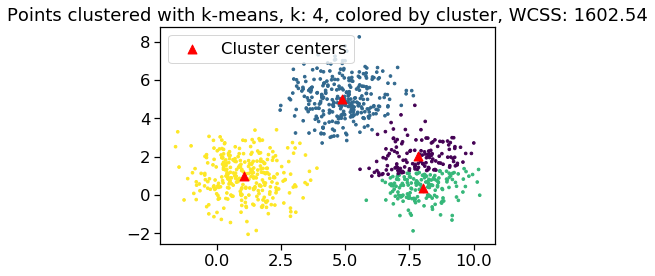

In [6]:
cluster_and_plot(data,4)

- **2d. Compare the WCSS of clustering into 3 & 4 clusters.  What's your conclusion?**


The WCSS of clustering into 3 is  greater  and the plot shows more optimal splitting into clasters(same size of the clusters, not like in clustering into 4)

- **2e. Plot different k values and their WCSS values.**  

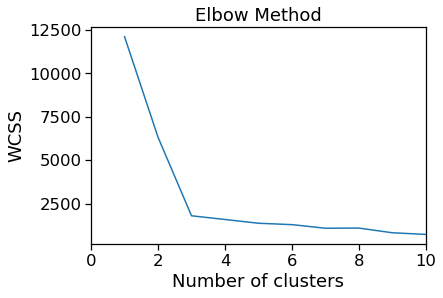

In [7]:
wcss_list = []
for k in range(1, 11):
    # pick random centers to be initial cluster centers
    initial_centers = data[np.random.randint(data.shape[0],size=k)]

    # cluster with k-means
    wcss = k_means(data, k, initial_centers)[2]
    wcss_list.append(wcss)
    
plt.plot(range(1, 11), wcss_list)
plt.xlim(0,10,1)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS');

**How many clusters would you classify into and why?**

From this plot We see that number of k = 3 is reasonable for us

### Question 3: Use your k-means function for image quantization

**Question 3a.** Run the following code to perform image quantization on an image `flower.jpg`.  

**Tip**: if the algorithm doesn't converge, or the image is not clear, check the data types of your Numpy arrays (which data type would you need for best precision?) 

WCSS channel 0: 25602636
WCSS channel 1: 24342883
WCSS channel 2: 17646994


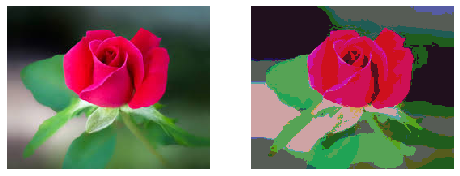

In [8]:
from PIL import Image
import scipy.misc

def apply_clustering(im):
    [width, height, color] = im.shape
    out = np.zeros_like(im)
    k = 3
    # apply clustering on each color channel
    for col_channel in range(color):
        # prepare 
        channel_vals = im[:,:,col_channel].ravel()
        data = np.expand_dims(channel_vals,1)

        #prepare random centers and call K_means method
        centers = data[np.random.randint(data.shape[0], size=k)]
        centers, assign, wcss = k_means(data, k, centers)
        print(f'WCSS channel {col_channel}: {int(wcss)}')
        
        #transform the colors in the image according to the clustering
        for i in range(k):
            channel_vals[assign == i] = centers[i]
        gray = np.reshape(channel_vals, [width, height])
        out[:,:,col_channel] = gray
    return out

# read image and apply clustering 
im1 = np.array(Image.open("flower.jpg"))
out1 = apply_clustering(im1)

# show input vs output
plt.figure(1,figsize=(8,16))
plt.subplot(1,2,1);
plt.imshow(im1);
plt.axis('off')

plt.subplot(1,2,2);
plt.imshow(np.float32(out1)/255)
plt.axis('off');


**Bonus Question 3b:** **Approximately by what magnitute was the image size reduced?**

We applied clustering on each color channel and then transformed the colors in the image according to the clustering, so we decreased the number of colors/pixels and got less size of the picture
<br>(this is magic ✩◝(◍⌣̎◍)◜✩)